# "Kaggle Titanic dataset analysis"
> "analysis of titanic dataset from kaggle"

- toc:true
- branch: master
- badges: true
- comments: true
- categories: [notebooks]
- tags: [jupyter, kaggle, machine learning]

![anthony-metcalfe-vnz2XeO2Y-g-unsplash](https://user-images.githubusercontent.com/8268939/79701196-e852f700-824f-11ea-9155-74668b2bc2fa.jpg)

#### Importing libraries

In [28]:
import pandas as pd
import numpy as np
import random as rnd
import pylab as plot

In [7]:
!kaggle competitions download titanic -p ~/workspace/sudheer-blog/datasets/inputs/titanic/

  0%|                                               | 0.00/34.1k [00:00<?, ?B/s]
100%|██████████████████████████████████████| 34.1k/34.1k [00:00<00:00, 7.00MB/s]


In [8]:
!unzip ~/workspace/sudheer-blog/datasets/inputs/titanic/titanic.zip -d ~/workspace/sudheer-blog/datasets/inputs/titanic && rm ~/workspace/sudheer-blog/datasets/inputs/titanic/titanic.zip

Archive:  /Users/sudheer/workspace/sudheer-blog/datasets/inputs/titanic/titanic.zip
replace /Users/sudheer/workspace/sudheer-blog/datasets/inputs/titanic/gender_submission.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


## import datasets

In [10]:
train_df = pd.read_csv('~/workspace/sudheer-blog/datasets/inputs/titanic/train.csv')
test_df = pd.read_csv('~/workspace/sudheer-blog/datasets/inputs/titanic/test.csv')
combine = [train_df, test_df]

## Preview the datasets

In [11]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [30]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Check the quality of the data

In [12]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Both Age and Cabin has null lot of null values, lets see how much percentage of these are null

#### Check Null values percentage

In [55]:
train_df.isnull().sum(axis = 0)/train_df.count()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.247899
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          3.367647
Embarked       0.002250
Died           0.000000
dtype: float64

# Check Age distribution

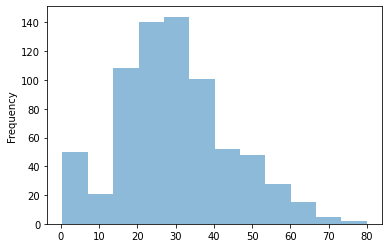

In [48]:
train_df['Age'].plot.hist(bins=12, alpha=0.5)

## Analyze by pivoting features

Lets analyse by following features
- Age
- Pclass
- Sex

### Group by Age

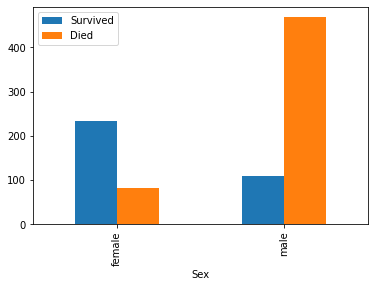

In [41]:
sample = train_df
sample['Died'] = 1 - sample['Survived']
sample.groupby('Sex').agg('sum')[['Survived','Died']].plot(kind='bar')

### Group by Pclass

In [38]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


### Group by Sex

In [51]:
train_df[["Sex", "Survived"]].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908
